# Evaluation

## General Plot settings

In [154]:
dir_to_save_plots = '../report/figures/'

## Machine specs
The evaluation was performed on a machine with the following specs:
- 12th Gen Intel(R) Core(TM) i7-1255U 1.70 GHz
- 16 GB of RAM
- Windows 11

The evaluation of MAFIA was performed using GPUMAFIA, which was installed on a virtual machine using VirtualBox. The virtual machine was configured with 4 CPUs and 4 GB of RAM. The operating system was Ubuntu 24.04.1 LTS.

CLIQUE and SUBCLU were evaluated on the host machine using ELKI.

## Data set size vs. runtime

- Tested on a 20-dimensional data set containing 5 clusters in 5 different subspaces.
- 10% of the data was added as noise records.
- CLIQUE stopped working after 7mio records and SUBCLU stopped working after 200,000 records. MAFIA was able to handle at least 15mio records.

### Settings

CLIQUE:
- xsi: 25
- tau: 0.08

SUBCLU:
- epsilon 0.02
- minpts: 250 (for 10k points). Doubled for each step, so 500 minpts for 20k, 1000 minpts for 40k, etc.

MAFIA:
- -a 1.4
- -b 0.35
- -M 20
- -n 1000
- -V
- --timing

### Plot

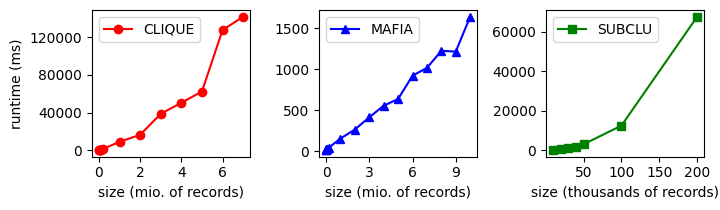

In [155]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
size =   [10000, 20000, 30000, 40000, 50000, 100000, 200000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000, 15000000]
clique = [62   , 119  , 155  , 203  , 235  , 533   , 1255  , 8795   , 16290  , 38581  , 50392  , 62348  , 127730 , 142005]
mafia =  [15   , 25   , 17   , 22   , 27   , 31    , 45    , 155    , 265    , 414    , 556    , 637    , 922    , 1016   , 1225   , 1215   , 1641]
subclu = [137  , 477  , 984  , 1751 , 3055 , 12490 , 67603]

# Figure with 3 subplots
fig, axs = plt.subplots(1, 3, figsize=(7.3, 2.2))

# CLIQUE (size in millions)
axs[0].plot([s / 1_000_000 for s in size[:len(clique)]], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('size (mio. of records)')
axs[0].set_ylabel('runtime (ms)')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].legend()

# MAFIA (size in millions)
axs[1].plot([s / 1_000_000 for s in size[:len(mafia)]], mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('size (mio. of records)')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].legend()

# SUBCLU (size in thousands)
axs[2].plot([s / 1000 for s in size[:len(subclu)]], subclu, 'gs-', label='SUBCLU')
axs[2].set_xlabel('size (thousands of records)')
axs[2].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[2].yaxis.set_major_locator(ticker.MaxNLocator(4))

axs[2].legend()

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'dataset_size_vs_runtime.png')

# Show plot
plt.show()

Both CLIQUE and MAFIA scales linearly with the number of records. SUBCLU seems to grow more exponentially, which also explains why it stopped working after 200,000 records.

## Accuracy

- Tested on a 10-dimensional data set containing 100,000 points for testing CLIQUE and MAFIA, however, SUBCLU was not able to handle this amount of data, so it was tested on a similar distribution of points with 20,000 points.
- 10% of the data was added as noise records.
- First case, has two clusters embedded in a different 4 dimensional subspace. Second case, has 4 clusters embedded in a different 4 dimensional subspace.

### Plus shape

#### Settings
CLIQUE:
- xsi: 10
- tau: 0.16

MAFIA:
- -a 0.08
- -b 0.3
- -M 20
- -n 1000
- -p
- -V
- --timing

#### Plot

![plus-shape](datasets\home-made\accuracy\plus_shape\composed_results\plot.png "Plus shape")

### 2 clusters

- 10 dimensions
- 2 clusters embedded in a different 4 dimensional subspace
- 10% noise

#### Settings

SUBCLU:
- epsilon: 0.05
- minpts: 850

CLIQUE:
- xsi: 20
- tau: 0.41
- prune: false

MAFIA:
- -a 3
- -b 0.6
- -M 20
- -n 1000
- -V
- -p
- --timing

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/mdcgen/accuracy/2clusters/100k/clique/3d_plot.png "CLIQUE") | ![MAFIA](datasets/mdcgen/accuracy/2clusters/100k/mafia/3d_plot.png) | ![SUBCLU](datasets/mdcgen/accuracy/2clusters/20k/subclu/3d_plot.png) |

MAFIA reports the correct clusters in both cases and detects the noise points.

CLIQUE also reports the two clusters, however, it also finds some noise points as clusters.

SUBCLU reports the correct clusters, but it also finds a lot extra incorrectly clusters.

### 4 clusters

- 10 dimensions
- 4 clusters
- 10% noise

#### Settings

SUBCLU:
- epsilon: 0.02
- minpts: 500

CLIQUE:
- xsi: 35
- tau: 0.2

MAFIA:
- -a 3
- -b 0.6
- -M 100
- -n 1000
- -V
- -p
- --timing

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/mdcgen/accuracy/4clusters/100k/clique/3d_plot.png "CLIQUE") | ![MAFIA](datasets/mdcgen/accuracy/4clusters/100k/mafia/3d_plot.png) | ![SUBCLU](datasets/mdcgen/accuracy/4clusters/20k/subclu/3d_plot.png) |

Again, MAFIA reports the correct clusters in both cases and detects the noise points.

CLIQUE fails to detect one of the clusters.

SUBCLU fails completly to detect the clusters.

### Bezier curve

- 2 dimensions
- 1 clusters
- 10% noise

#### Settings
CLIQUE:
- xsi: 20
- tau: 0.025

MAFIA:
- -b 0.35
- -M 40
- -a 0.15
- -n 1000
- -p
- -V
- --timing

SUBCLU:
- epsilon: 0.2
- minpts: 76
- mindim: 2

DBSCAN:
- epsilon: 0.04
- minpts: 100

#### Plot

| CLIQUE | MAFIA | SUBCLU |
|--|--|--|
| ![clique](datasets/artificalCluster/accuracy/bezier/clique/plot.png "CLIQUE") | ![MAFIA](datasets/artificalCluster/accuracy/bezier/mafia/plot.png) | ![SUBCLU](datasets/artificalCluster/accuracy/bezier/subclu/plot.png) |

Even though one might expect SUBCLU to produce the same results as DBSCAN when run on a 2D dataset with mindim=2, the results will differ. This is because SUBCLU always uses a bottom-up approach to explore subspaces. It first examines 1D subspaces before moving on to higher-dimensional ones. When mindim is set to 2, SUBCLU disregards clusters that exist in subspaces with dimensionality less than 2. As a result, even though both algorithms are set to work in the full 2D space, the subspace exploration process and the focus on dimensionality lead SUBCLU to produce different clustering results than DBSCAN.

## Cluster dimensionality vs. runtime

- Tested on a 30-dimensional data set containing 500,000 points.
- 10% of the data was added as noise records.
- The data set contains a _single_ cluster embedded in increasing dimensional subspaces.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.25

MAFIA:
- -a 2.2
- -b 0.35
- -M 40
- -n 1000
- -p
- -V
- --timing

### Plot

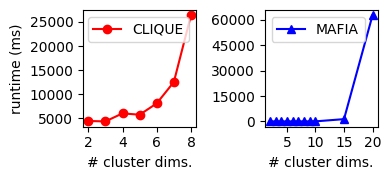

In [156]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [2   , 3   , 4   , 5   , 6   , 7    , 8    , 9 , 10, 15 , 20]
mafia =  [45  , 63  , 55  , 45  , 63  , 55   , 60   , 79, 86, 1387, 62607]
clique = [4440, 4347, 6017, 5740, 8093, 12532, 26373]

# Figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(4, 1.9))

# CLIQUE
axs[0].plot(dims[:len(clique)], clique, 'ro-', label='CLIQUE')
axs[0].set_xlabel('# cluster dims.')
axs[0].set_ylabel('runtime (ms)')
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[0].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].legend()

# MAFIA
axs[1].plot(dims, mafia, 'b^-', label='MAFIA')
axs[1].set_xlabel('# cluster dims.')
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(4))
axs[1].yaxis.set_major_locator(ticker.MaxNLocator(5))
axs[1].legend()

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'cluster_dimensionality_vs_runtime.png')

# Show plot
plt.show()

MAFIA uses almost no time to find the clusters compared to CLIQUE of the cluster dimensions is not higher than 16. After that, the time seems to increase exponentially.

## Data dimensionality vs. runtime

- Tested on a 1,000,000 points data set with 3 clusters.
- 10% of the data was added as noise records.
- The data dimensionality was increased from 10 to 100.

### Settings

CLIQUE:
- xsi: 30
- tau: 0.3
- prune: false

MAFIA:
- -a 2.2
- -b 0.35
- -M 40
- -n 1000
- -V
- --timing

### Plot

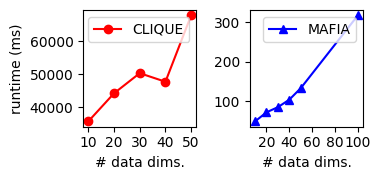

In [157]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data
dims =   [10   , 20   , 30   , 40   , 50 , 100]
mafia_runtime =  [49   , 72   , 85   , 104  , 133, 317]
clique_runtime = [35688, 44180, 50275, 47682, 67772]

# CLIQUE:
# 10d = 66 clusters found
# 20d = 84
# 30d = 93
# 40d = 77
# 50d = 93
# 100d, not able to run.

# MAFIA:
# 10d  = 3 clusters found
# 20d  = 4 clusters found
# 30d  = 3 clusters found
# 40d  = 4 clusters found
# 50d  = 3 clusters found
# 100d = 4 clusters found

# Figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(3.9, 1.9))

# CLIQUE
axs[0].plot(dims[:len(clique_runtime)], clique_runtime, 'ro-', label='CLIQUE')
axs[0].legend()
axs[0].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[0].set_xlabel('# data dims.')
axs[0].set_ylabel('runtime (ms)')

# MAFIA
axs[1].plot(dims, mafia_runtime, 'b^-', label='MAFIA')
axs[1].legend()
axs[1].xaxis.set_major_locator(ticker.MaxNLocator(5))
axs[1].set_xlabel('# data dims.')

# Tight layout
plt.tight_layout()

# Save plot
fig.savefig(dir_to_save_plots + 'data_dimensionality_vs_runtime.png')

# Show plot
plt.show()

Both CLIQUE and MAFIA seems to scale linearly with the number of dimensions in the dataset.

## Sensitivity of alpha
- 1,000,000 data points
- 20 dims
- 5 clusters
- 10% outliers

### Settings
- -b 0.35
- -M 40
- -n 1000
- -V
- -a 0.8 -> 5.2 (step size: 0.4)

### Plot

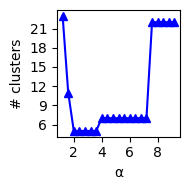

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Data
alpha = np.arange(1.2, 9.6, 0.4)
clusters_found = [23, 11, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 22, 22, 22, 22, 22]

# Figure size
plt.figure(figsize=(2, 2))

# Plot
plt.plot(alpha, clusters_found, 'b^-')

# Set number of x- and y-ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(5))
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(7))

# Add labels
plt.xlabel('α')
plt.ylabel('# clusters')

# Tight layout
plt.tight_layout()

# Save plot
plt.savefig(dir_to_save_plots + 'sensitivity_alpha.png')

# Show plot
plt.show()

MAFIA sensitivity to alpha is not that high as observed in article. The number of clusters found is almost the same if alpha is somewhere between 2 and 7. After that, the number of clusters starts to increase.

## Real-world data set

### Iris

#### Settings
- CLIQUE: xsi: 20, tau: 0.1
- Subclu: epsilon: 0.05, minpts: 210
- MAFIA: -M 20 -a 1.4 -b 0.2 -p -V --timing

#### Plot

| Original | CLIQUE |
|--|--|
| ![original](datasets/real-world/iris/plot.png "Original") | ![clique](datasets/real-world/iris/clique/plot.png "CLIQUE") |
| MAFIA | SUBCLU |
| ![MAFIA](datasets/real-world/iris/mafia/plot.png) | ![SUBCLU](datasets/real-world/iris/subclu/plot.png) |

### Date-fruit

#### Settings
SUBCLU:
- epsilon: 0.05
- minpts: 210

CLIQUE and MAFIA wasn't able to produce meaningful clusters.

#### Plot

| Original | SUBCLU |
|--|--|
| ![original](datasets/real-world/date-fruit/plot.png "Original") | ![subclu](datasets/real-world/date-fruit/subclu/plot.png "SUBCLU") |